# Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering as agg
from sklearn.preprocessing import MinMaxScaler as mms

In [102]:
df = pd.read_csv("./datasets/cars_clus.csv")
print(df.shape)
df.head()

(159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


# Removing null values

In [104]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      157 non-null    object 
 2   sales      157 non-null    object 
 3   resale     157 non-null    object 
 4   type       157 non-null    object 
 5   price      157 non-null    object 
 6   engine_s   157 non-null    object 
 7   horsepow   157 non-null    object 
 8   wheelbas   157 non-null    object 
 9   width      157 non-null    object 
 10  length     157 non-null    object 
 11  curb_wgt   157 non-null    object 
 12  fuel_cap   157 non-null    object 
 13  mpg        157 non-null    object 
 14  lnsales    157 non-null    object 
 15  partition  157 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.9+ KB


In [114]:
to_drop = []
for var2 in cols :
    tempdf = df[df[var2] == '$null$']
    df = df.drop(tempdf.index, axis = 'index')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   117 non-null    object 
 1   model      117 non-null    object 
 2   sales      117 non-null    object 
 3   resale     117 non-null    object 
 4   type       117 non-null    object 
 5   price      117 non-null    object 
 6   engine_s   117 non-null    object 
 7   horsepow   117 non-null    object 
 8   wheelbas   117 non-null    object 
 9   width      117 non-null    object 
 10  length     117 non-null    object 
 11  curb_wgt   117 non-null    object 
 12  fuel_cap   117 non-null    object 
 13  mpg        117 non-null    object 
 14  lnsales    117 non-null    object 
 15  partition  117 non-null    float64
dtypes: float64(1), object(15)
memory usage: 15.5+ KB


# Turning the data from string to float

In [107]:
cols1 = ['sales', 'resale', 'type', 'price', 'engine_s','horsepow', 'wheelbas', 
         'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']

for var3 in cols1 :
    temparr = np.array(df[[var3]])
    for pos in range(0, len(temparr)):
        temparr[pos] = float(temparr[pos])
    
    df.drop(var3, axis = 'columns')
    df[var3] = temparr

df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0.0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0.0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0.0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0.0
5,Audi,A6,18.78,23.555,0,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,2.933,0.0


# Defining features

In [108]:
features = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']].copy()

In [109]:
minmax = mms()
x = minmax.fit_transform(features.values)
x[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

# Making model

In [110]:
model = agg(n_clusters = 6, linkage = 'complete')
model.fit(x)
model.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [111]:
features['clusters'] = model.labels_
features.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,clusters
0,1.8,140,101.2,67.3,172.4,2.639,13.2,28,1
1,3.2,225,108.1,70.3,192.9,3.517,17.2,25,2
3,3.5,210,114.6,71.4,196.6,3.85,18,22,2
4,1.8,150,102.6,68.2,178,2.998,16.4,27,1
5,2.8,200,108.7,76.1,192,3.561,18.5,22,2


# Plotting result

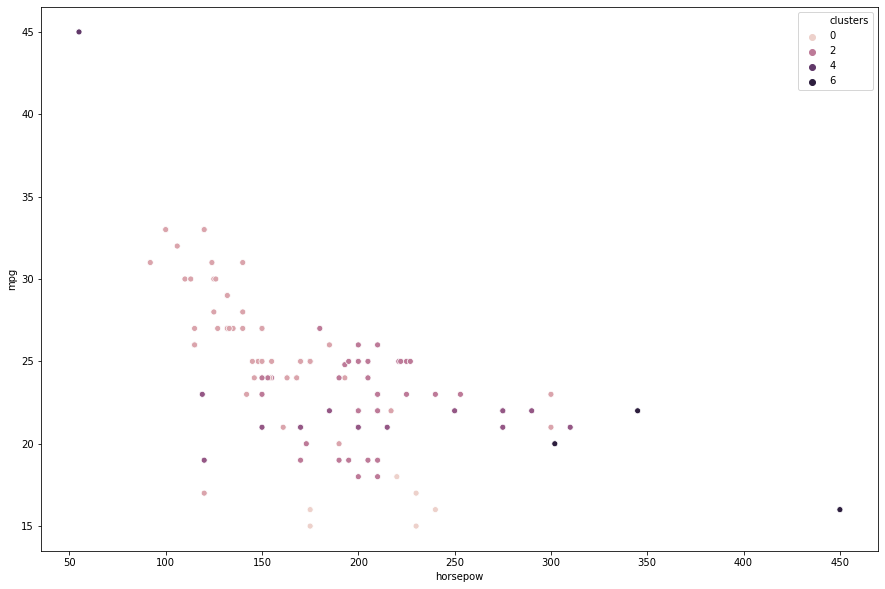

In [118]:
fig1, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10))
sns.scatterplot(x = 'horsepow', y = 'mpg', hue = 'clusters', data = features, ax = ax1, cmap = 'rgb')
plt.legend(loc = 'upper right')
plt.show()